In [25]:
import re
import numpy as np

# 读取数据、解析数据
line_re = re.compile(r"Dur:(?P<dur>\d+) ms CPM:(?P<cpm>-?[0-9.]+) RD:(?P<rd>-?[0-9.]+) uSv/h\n")
with open("brng.log", "r") as file:
    parsed_lines = map(lambda line: line_re.match(line).groupdict(), file)
    durations = map(lambda groupdict: int(groupdict["dur"]), parsed_lines)
    data_set = np.fromiter(durations, dtype=np.uint32)

# data_set = data_set[:len(data_set)//2]

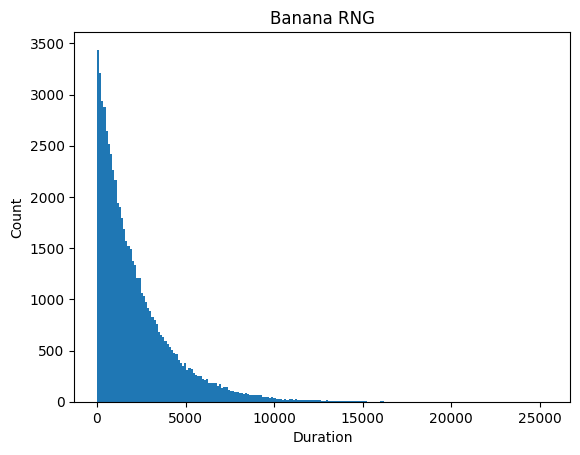

In [26]:
import matplotlib.pyplot as plt

# 绘制直方图
plt.hist(data_set, bins="auto")
plt.title("Banana RNG")
plt.xlabel("Duration")
plt.ylabel("Count")
plt.show()

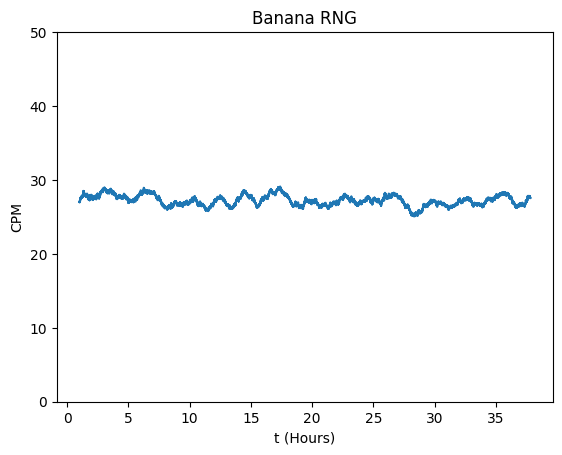

In [42]:
import collections
from scipy import signal

WINDOW_SIZE = 60 * 60_000 # 窗口大小（毫秒）

values = collections.deque[int]()
window_dur = 0
timestemp = 0
cpms = []
timestemps = []
for dur in data_set:
    values.append(dur)
    timestemp += dur
    window_dur += dur
    if window_dur > WINDOW_SIZE:
        window_dur -= values.popleft()

        cpms.append(len(values) / window_dur * 1000 * 60) # 计算 CPM
        timestemps.append(timestemp / 1000 / 60 / 60)

# filtered_cpms = signal.savgol_filter(cpms, 100, 3)
plt.plot(timestemps, cpms)
plt.title("Banana RNG")
plt.xlabel("t (Hours)")
plt.ylabel("CPM")
plt.ylim(top=50, bottom=0)
plt.show()
